In [1]:
import sys
sys.path.insert(1, '../')
import torch

from spiral import (
    IntegrateAndFireSoma,
    LeakyMembrane,
    ExponentialDepolaristicMembrane,
    AdaptiveMembrane,
    Axon
)
AELIF = \
    AdaptiveMembrane(
        ExponentialDepolaristicMembrane(
            LeakyMembrane(
                IntegrateAndFireSoma
            )
        )
    )
new_n = lambda: AELIF(
    name='neuronsA',
    shape=(3,),
    dt=1.,
    analyzable=True,
)

In [2]:
from spiral.analysis import FunctionGenerator
I = FunctionGenerator.generate(250, shape=(3,),
           baseline={50*i: 150 if i%2 else 0 for i in range(5)})
I[:,1] *= 1.2

In [3]:
from spiral.analysis import Simulator
import matplotlib.pyplot as plt
from matplotlib_dashboard import MatplotlibDashboard

def simulate_and_plot(n, a, I, title=''):
    s = Simulator(n.progress)
    n.reset()
    s.simulate(inputs={'direct_input': I}, times=200)
    plt.figure(figsize=(14,5))
    md = MatplotlibDashboard([
        ['N',],
        ['S',],
        ['I',]
    ], hspace=.5, wspace=.3)
    n.plot_spikes(md['S'])
    a.plot__neurotransmitter(md['N'])
    md['I'].plot(I, color='blue', alpha=.2)
    md['I'].plot(I.mean(axis=1), color='blue')
    md['I'].set_ylabel('Current')
    md['N'].set_title(title)
    plt.show()

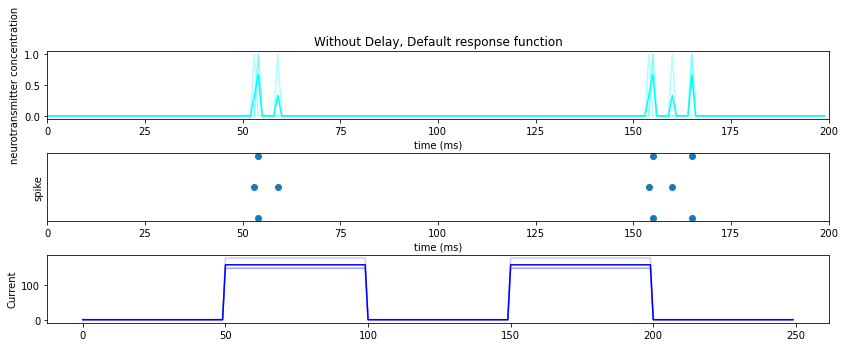

In [4]:
n = new_n()
a = Axon(
    terminal=[2],
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, Default response function')

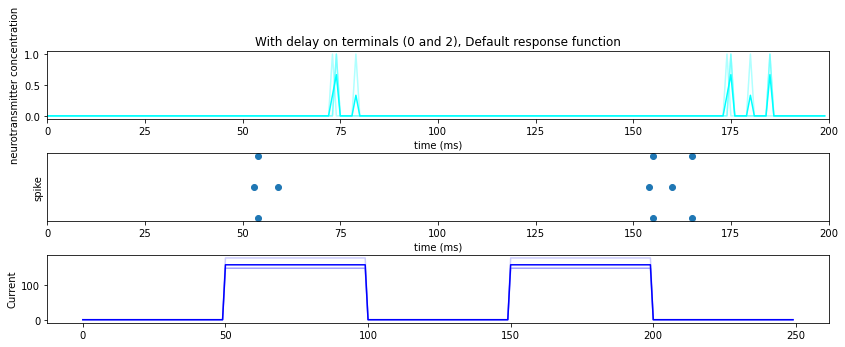

In [5]:
n = new_n()
a = Axon(
    terminal=[2],
    delay=20.,
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'With delay on terminals (0 and 2), Default response function')

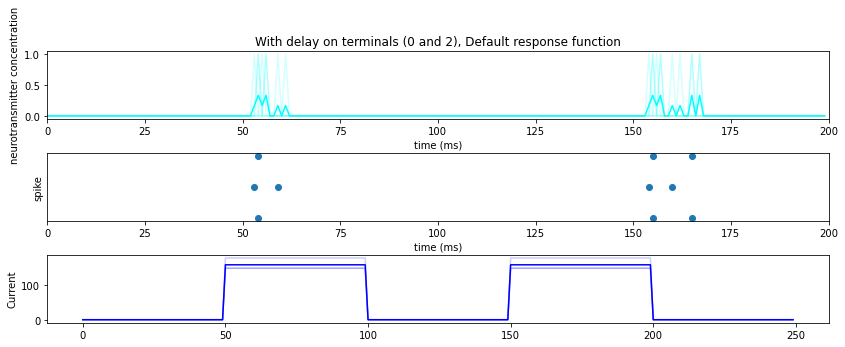

In [6]:
n = new_n()
a = Axon(
    terminal=[2],
    delay=torch.as_tensor([0,2]),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'With delay on terminals (0 and 2), Default response function')

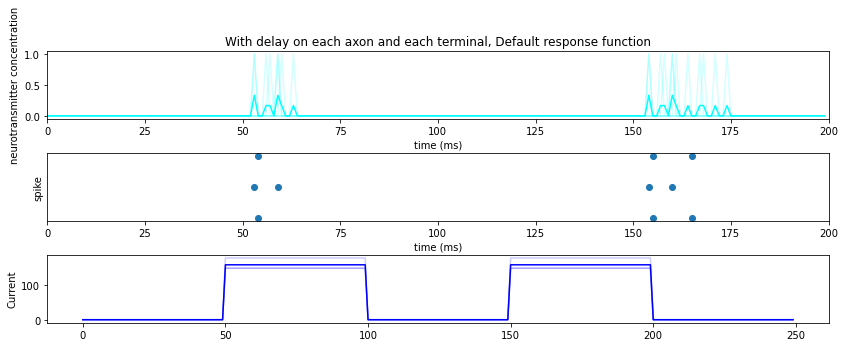

In [7]:
n = new_n()
a = Axon(
    terminal=[2],
    delay=torch.as_tensor([[2,3],[0,0],[6,9]]),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'With delay on each axon and each terminal, Default response function')

In [8]:
from spiral import (
    CompositeResponseFunction,
    ScalingResponseFunction,
    LeakyResponseFunction,
)

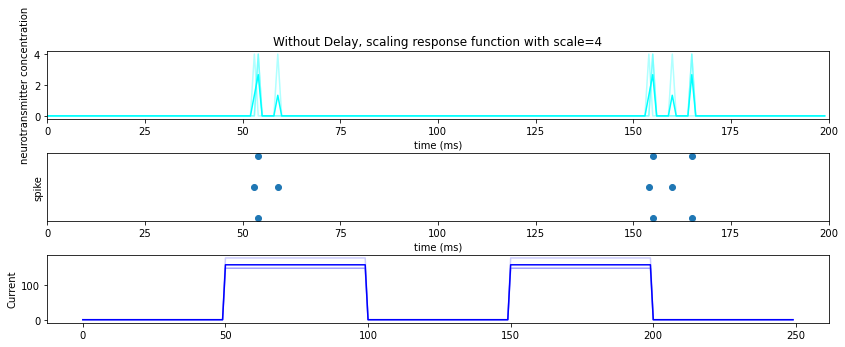

In [9]:
n = new_n()
a = Axon(
    terminal=[2],
    response_function=ScalingResponseFunction(scale=4.),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, scaling response function with scale=4')

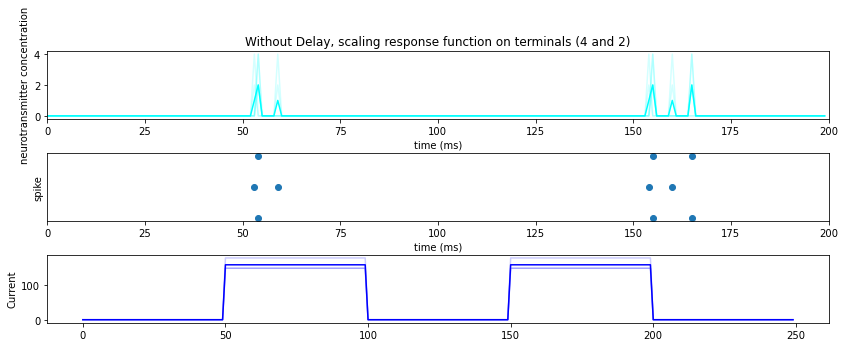

In [10]:
n = new_n()
a = Axon(
    terminal=[2],
    response_function=ScalingResponseFunction(scale=torch.as_tensor([4., 2.])),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, scaling response function on terminals (4 and 2)')

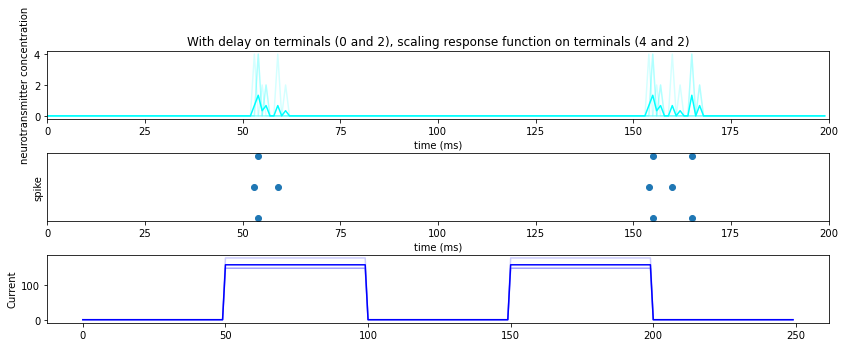

In [11]:
n = new_n()
a = Axon(
    terminal=[2],
    delay=torch.as_tensor([0,2]),
    response_function=ScalingResponseFunction(scale=torch.as_tensor([4., 2.])),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'With delay on terminals (0 and 2), scaling response function on terminals (4 and 2)')

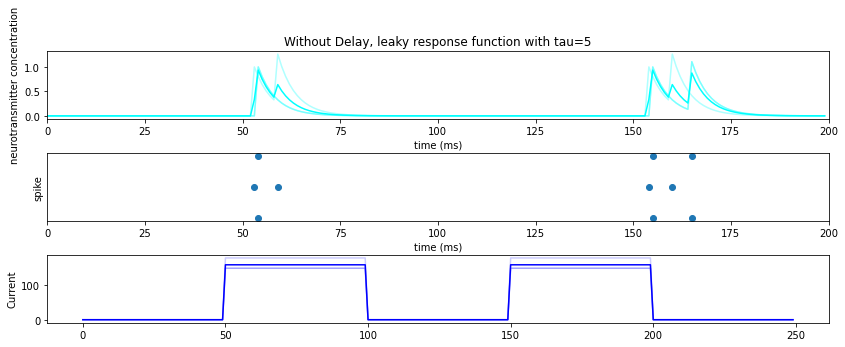

In [12]:
n = new_n()
a = Axon(
    terminal=[2],
    response_function=LeakyResponseFunction(tau=5.),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, leaky response function with tau=5')

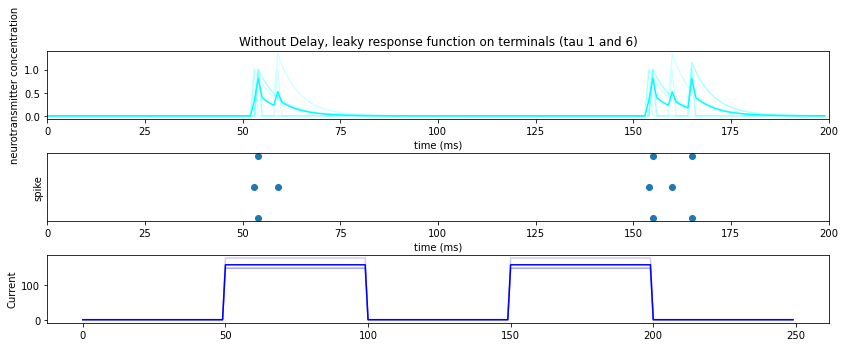

In [13]:
n = new_n()
a = Axon(
    terminal=[2],
    response_function=LeakyResponseFunction(tau=torch.tensor([1.,6.])),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, leaky response function on terminals (tau 1 and 6)')

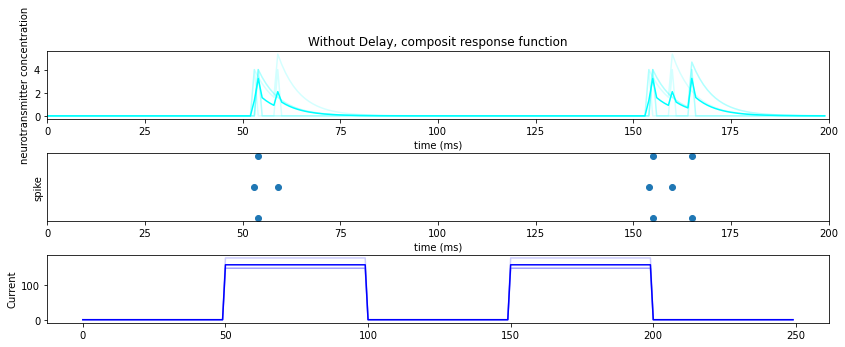

In [14]:
n = new_n()
a = Axon(
    terminal=[2],
    response_function=CompositeResponseFunction(response_functions=[
        LeakyResponseFunction(tau=torch.tensor([1.,6.])), ScalingResponseFunction(scale=4.)
    ]),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Without Delay, composit response function')

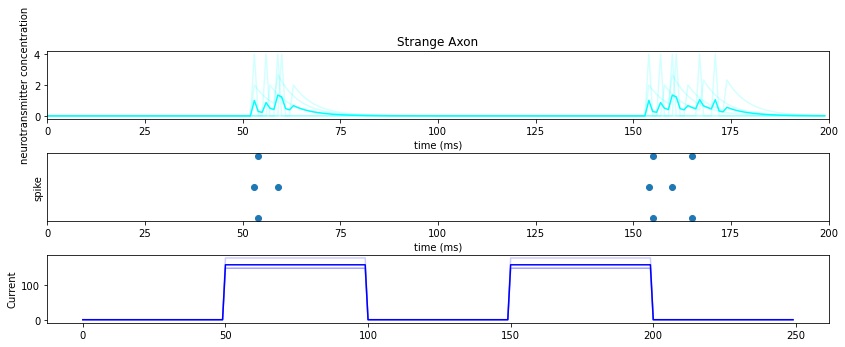

In [15]:
n = new_n()
a = Axon(
    terminal=[2],
    delay=torch.as_tensor([[2,3],[0,0],[6,9]]),
    response_function=CompositeResponseFunction(response_functions=[
        LeakyResponseFunction(tau=torch.tensor([1.,6.])),
        ScalingResponseFunction(scale=torch.as_tensor([4., 2.])),
    ]),
    analyzable=True,
)
n.use(a)
simulate_and_plot(n, a, I, 'Strange Axon')

In [16]:
from spiral.analysis import Simulator
import matplotlib.pyplot as plt
from matplotlib_dashboard import MatplotlibDashboard

def simulate_and_plot(n, a1, a2, I, title=''):
    s = Simulator(n.progress)
    n.reset()
    s.simulate(inputs={'direct_input': I}, times=200)
    plt.figure(figsize=(14,8))
    md = MatplotlibDashboard([
        ['N2',],
        ['N1',],
        ['S',],
        ['I',]
    ], hspace=.5, wspace=.3)
    n.plot_spikes(md['S'])
    a1.plot__neurotransmitter(md['N1'])
    a2.plot__neurotransmitter(md['N2'])
    md['I'].plot(I, color='blue', alpha=.2)
    md['I'].plot(I.mean(axis=1), color='blue')
    md['I'].set_ylabel('Current')
    md['N2'].set_title(title)
    plt.show()

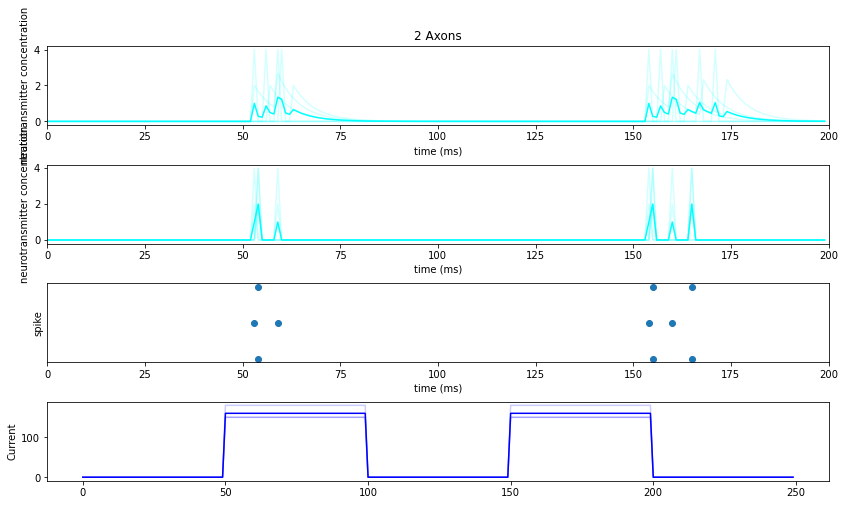

In [17]:
n = new_n()
a1 = Axon(
    terminal=[2],
    response_function=ScalingResponseFunction(scale=torch.as_tensor([4., 2.])),
    analyzable=True,
)
a2 = Axon(
    terminal=[2],
    delay=torch.as_tensor([[2,3],[0,0],[6,9]]),
    response_function=CompositeResponseFunction(response_functions=[
        LeakyResponseFunction(tau=torch.tensor([1.,6.])),
        ScalingResponseFunction(scale=torch.as_tensor([4., 2.])),
    ]),
    analyzable=True,
)
n.use(a1)
n.use(a2)
simulate_and_plot(n, a1, a2, I, '2 Axons')